3-1 절에서 농어 무게를 예측하는 k-최근접 이웃 회귀 모델을 보고했다. <br>
이번에는 모델이 실전에 잘 적용되는지 직접 확인하기로 했다.

농어 담당 직원은 아주 큰 농어를 골라 무게를 예측해 달라고 요청했다. 무려 길이가 50cm인 농어이다.

앞서 만든 모델을 사용해 이 농어의 무게를 예측했다. 담당 직원은 이상하다는 듯한 태도를 보였다. <br>
저울에 나온 농어의 무게와 너무 차이가 났기 때문이다.

### k-최근접 이웃의 한계

먼저 1절에서 사용한 데이터와 모델을 준비하자. ( numpy도 미리 import 하자. ) <br>
http://bit.ly/perch_data

In [20]:
import numpy as np

In [21]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

이번에도 데이터를 훈련 세트와 테스트 세트로 나눈다. 특성 데이터는 2차원 배열로 변환한다.

In [22]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [23]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


최근접 이웃 개수를 3으로 하는 모델을 훈련한다. 여기까지는 3-1절의 내용 그대로이다.

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


이제 이 모델을 사용해 길이가 50cm인 농어의 무게를 예측해 보겠다.

In [25]:
print(knr.predict([[50]]))

[1033.33333333]


혼공머신의 모델은 50cm의 농어 무게를 약 1033.33g으로 예측하였다. <br>
그런데 실제 이 모델의 무게는 훨씬 더 많이 나간다고 한다. 어째서 이런 상황일까?

훈련 세트와 50cm 농어 그리고 이 농어의 최근접 이웃을 산점도에 표시하겠다. <br>
2장에서 보았듯이 사이킷런의 k-최근접 이웃 모델의 kneighbors() 메서드를 사용하면 <br>
가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있다.

In [26]:
import matplotlib.pyplot as plt

In [27]:
distances, indexes = knr.kneighbors([[50]])
print(distances, indexes)

[[6. 7. 7.]] [[34  8 14]]


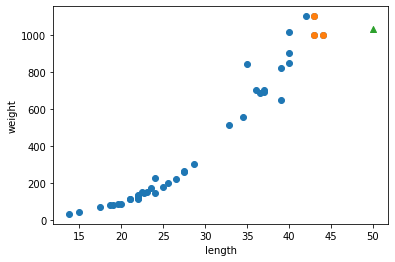

In [28]:
plt.scatter(train_input, train_target )
plt.scatter(train_input[indexes], train_target[indexes])
plt.scatter(50, 1033, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에 k-최근접 이웃 알고리즘은 이 샘플들의 무게들을 평균한다. <br>
이웃 샘플들의 무게 평균을 알아 보자.

In [29]:
print(np.mean(train_target[indexes]))

1033.3333333333333


모델이 예측했던 값과 정확히 일치한다. 길이가 100cm여도 가장 가까운 것은 45cm이므로 여전히 1033g이라고 인식한다.

이런 식이라면 농어가 아무리 더 커도 무게가 더 늘어나지 않는다.

가장 큰 농어가 포함되도록 훈련 세트를 다시 만들어야 하지만, <br>
이런 방법은 마음에 들지 않는다.

 ### 선형 회귀

선형 회귀는 널리 사용되는 대표적인 회귀 알고리즘이다. <br>
특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다.

P135를 보면 가장 농어 데이터 산점도를 가장 잘 표현하는 직선이 어떤 것인지를 알 수 있다.

이런 직선을 머신러닝 알고리즘이 자동으로 찾을 수 있다. 아주 편리하지 않을까?

사이킷런은 sklearn.linear_model 아래의 LinearRegression 클래스로 선형 회귀 알고리즘을 구현해 놓았다. <br>
앞으로 계속 보게 되는 사이킷런들의 모델 클래스들은 훈련, 평가, 예측하는 메소드 이름이 모두 동일하다.

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


In [33]:
print(lr.predict([[50]]))

[1241.83860323]


k-최근접 이웃 회귀를 사용했을 때와 달리 선형 회귀는 50cm 농어의 무게를 아주 높게 예측했다.

하나의 직선을 그리려면 y = ax + b 라는 일차방정식에서 a와 b값을 알아야 한다. <br>
a와 b값은 lr 객체의 coef_와 intercept_ 값에 각각 저장되어 있다. 

In [34]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


coef_ 의 특성이 리스트인 이유는 여러 속성이 들어갈 수 있기 때문이다.

농어의 길이 15에서 50까지 그려 보자. 이 직선을 그리려면, 앞에서 구한 기울기와 절편을 사용하여 <br>
(15, 15 * 39 - 709 ) 와 ( 50 , 50 * 39 - 709 ) 두 점을 이으면 된다. 

훈련 세트의 산점도와 함께 그려 보자.

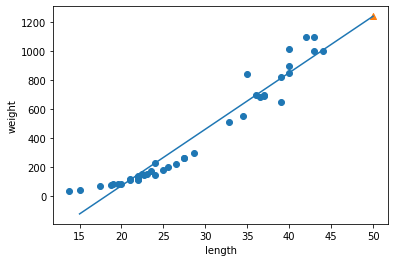

In [36]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, lr.predict([[50]]), marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

이제 훈련 세트 범위를 벗어난 농어의 무게도 예측할 수 있다. 그럼 이전 절과 같이 <br>
훈련 세트와 테스트 세트에 대한 R^2 점수를 확인해 보자.

In [37]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


### 다항 회귀

2차 방정식의 형태는 a * x^2 + b * x + c 인데, 산점도 분포를 보면 일직선이라기보다 왼쪽 위로 조금 구부러진 곡선이다.

최적의 곡선을 찾으려면( 2차 방정식의 그래프를 그리려면 ) 길이를 제곱한 항이 훈련 세트에 추가되어야 한다.

사실 넘파이를 사용하면 아주 간단히 그릴 수 있다. 139페이지의 그림처럼 농어의 길이를 제곱해서 원래 데이터 앞에 붙여 보자.

2장에서 사용했던 np.column_stack() 함수 사용하면 아주 간단하다. train_input을 제곱한 것과 train_input, 두 배열을 나란히 붙이자. <br>
test_input도 마찬가지이다.

In [39]:
train_poly = np.column_stack((train_input ** 2 , train_input))
test_poly = np.column_stack((test_input ** 2 , test_input))


In [40]:

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


원래 특성인 길이를 제곱하여 왼쪽 열에 추가했기 때문에 훈련 세트와 테스트 세트 모두 열이 2개로 늘어났다.

다시 train_poly를 통해 선형 회귀 모델을 훈련해보겠다. 이 모델이 2차 방정식의 a, b, c를 잘 찾을 것이라고 기대해보자.

여기서 주목할 점은 2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용한다는 것이다.

목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다. 이 훈련 세트로 선형 회귀 모델을 훈련한 다음 50cm짜리 농어에 대해 무게를 예측해 보자.

앞서 훈련 세트에서 했던 것처럼 테스트할 때는 이 모델에 농어 길이의 제곱과 원래 길이를 같이 넣어주어야 한다.

In [43]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


3-1절에서 훈련한 모델보다 훨씬 더 높은 값을 예측했다. 이 모델이 훈련한 계수와 절편을 출력해 보자.

In [44]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


이 모델은 다음과 같은 그래프를 학습했다. <br>
y = 1.01*x^2 + (-21.6)*x + 116.05

이런 방정식을 다항식이라 부르며 다항식을 사용한 회귀를 다항 회귀라 부른다. 

그럼 2차 방정식의 계수와 절편 a, b, c를 알았으니 이전과 동일하게 훈련 세트의 산점도에 그래프로 그려 보겠다. <br>
여기서는 1씩 짧게 그려 보겠다.

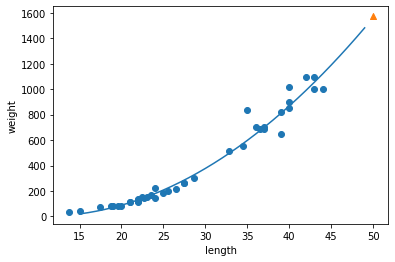

In [46]:
# 구간별 직선을 그리기 위해 15에서 19까지 정수 배열을 만든다.
point = np.arange(15,50)

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 그래프를 그린다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50,1574, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

그럼 훈련 세트와 테스트 세트의 R^2 점수를 평가해 보겠다.

In [47]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


과소 적합이 조금 남아 있다. 그러면 좀 더 복잡한 모델이 필요할 것 같다.